# TMDB Movies Dataset: Data Exploration

TMDB is a popular online database for movies, TV shows and celebrities. It provides extensive information on films, including cast, crew, plot summaries, ratings, trailers and more. TMDB is known for its vast and detailed collection of information about movies and TV shows. It includes data on various aspects like cast, crew, genres, production details and user ratings.  
  
The TMDB_movie_dataset is updated daily.  
  
Our goal is to analyze and preprocess the dataset in preparation for the project titled "TMDB Movies Dataset: Predicting Movie Ratings, XGBoost vs. (LGBM and RandomForest) Stacking". In this project, we aim to predict movie ratings (the vote_average feature) using various machine learning algorithms.

This project is divided into two major sections:  
First, we will conduct an in-depth analysis of the entire dataset to identify which data points are incomplete or missing. This exploratory data analysis will help us understand the overall structure of the data, assess its quality and determine the potential impact of missing values on model performance.  
Next, we will proceed to reduce the dataset to a more manageable and meaningful size, focusing on the data that will be most useful for our prediction task. This step will involve carefully selecting and filtering out features or records that could negatively affect model predictions, such as irrelevant or highly incomplete data. During this phase, special attention will be paid to data that may introduce noise, unnecessary complexity or bias into the model.  
The reduced dataset will then undergo further analysis, where we will focus on uncovering relationships between features and identifying patterns that could improve prediction accuracy. Our aim is to build a well-structured dataset that maximizes the potential of the machine learning models, ensuring that key features are optimized for the subsequent predictive task.  
  
By the end of this process, we will be well-prepared to apply advanced machine learning techniques including XGBoost, LightGBM and Random Forest and ultimately assess the performance of a stacking ensemble to predict movie ratings accurately.

---
## Data Import and Data Exploration

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Custom Functions

In [2]:
# Function for an initial inspection of the data
def get_data_info(dataframe):
    '''
    function to get most important info about DataFrame
    '''
    print("\nBASIC INFO\n")
    print(dataframe.info())
    print("=" * 100)
    print("DATAFRAME SHAPE\n", dataframe.shape)
    print("=" * 100)
    print("NUMBER OF DUPLICATE ROWS\n", dataframe.duplicated().sum())
    print("=" * 100)
    print("NULL VALUES")
    print(dataframe.isnull().sum())

# Function for info about missing data
def info_missing_values(df, col1, col2):
    print("=" * 100)
    print("\nMISSING", col1.upper(), "\n")
    print("Number of rows with missing", col1, ": ", df[col1].isnull().sum())
    print("Number of rows with missing", col1, "and positive", col2, ": ", len(df[[col1, col2]][(df[col1].isnull()) & (df[col2] > 0)]))
    print("\nAbout ", round(len(df[[col1, col2]][(df[col1].isnull()) & (df[col2] > 0)]) / df[col1].isnull().sum() * 100, 2), "% of rows with missing", col1, "have a positive", col2)


# matplotlib settings
mpl.rc("lines", linewidth = 2.)
mpl.rc("axes", facecolor = ".9", edgecolor = "k")
mpl.rc("xtick", color = "k")
mpl.rc("ytick", color = "k")
mpl.rc("text", color = "k")
mpl.rc("figure", facecolor = "w", edgecolor = "k")

# Function for histogram plots
def plot_hist(df, features, bins=25):
    """
    Plot histograms for specified features in the DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        features (list): List of column names (features) to plot histograms for.
        bins (int): Number of bins for the histograms. Default is 25.
    """
    num_features = len(features)
    fig, axs = plt.subplots(num_features, 1, figsize=(8, 6*num_features))

    # Adjusting axes if only one feature is provided
    if num_features == 1:
        axs = [axs]

    # Loop through each feature and plot its histogram
    for i, feature in enumerate(features):
        axs[i].hist(df[feature], bins=bins, color='royalblue', edgecolor='black')
        axs[i].grid(False)
        axs[i].set_axisbelow(True)
        axs[i].xaxis.grid(True, color='0.95', linewidth=1, linestyle="--")
        axs[i].yaxis.grid(True, color='0.95', linewidth=1, linestyle="--")
        axs[i].set_title(f'Histogram of {feature}')

    plt.subplots_adjust(wspace=0.5)
    plt.show()

    
# Function for scatter plots with filtered dataframe
def plot_scatter_filter(df, columns, titles):
    """
    Plot scatter plots for specified feature pairs in the DataFrame after filtering.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        columns (list): List of tuples, each containing a column name and its upper limit for filtering.
        titles (list): List of titles for the scatter plots.
    """
    num_plots = len(columns)
    plt.figure(figsize=(8, 6*num_plots))

    # Loop through each feature pair and plot their scatter plot
    for i in range(num_plots):
        plt.subplot(num_plots, 1, i+1)
        df_filtered = df[(df[columns[i][0]] > 0) & (df[columns[i][0]] <= columns[i][1])]
        plt.scatter(x=df_filtered[columns[i][0]], y=df_filtered["vote_average"], color='royalblue') 
        plt.title(titles[i])
        plt.xlabel(columns[i][0], color='k')
        plt.ylabel('vote_average', color='k')
        plt.grid(False)
        plt.gca().set_axisbelow(True)
        plt.gca().xaxis.grid(True, color='0.95', linewidth=1, linestyle="--")
        plt.gca().yaxis.grid(True, color='0.95', linewidth=1, linestyle="--")

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
# Function for a custom scatter matrix
def custom_scatter_matrix(df, features):
    """
    Plot a custom scatter matrix for specified features in the DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        features (list): List of column names (features) to plot in the scatter matrix.
    """
    num_features = len(features)
    fig, axs = plt.subplots(num_features, num_features, figsize=(4*num_features, 4*num_features))

    # Loop through each feature pair and plot their scatter plot or histogram
    for i in range(num_features):
        for j in range(num_features):
            if i == j:
                axs[i, j].hist(df[features[i]], bins=25, color='royalblue', edgecolor='black')
                axs[i, j].set_xlabel(features[i])
                axs[i, j].set_ylabel("Frequency")
            else:
                axs[i, j].scatter(df[features[j]], df[features[i]], color='royalblue', alpha=0.5)
                axs[i, j].set_xlabel(features[j])
                axs[i, j].set_ylabel(features[i])

    plt.tight_layout()
    plt.show()

# Function for scatter plots for specified pairs of features
def plot_scatter_pairs(df, pairs):
    """
    Plot scatter plots for specified feature pairs in the DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        pairs (list): List of tuples, each containing two column names for a feature pair.
    """
    num_plots = len(pairs)
    plt.figure(figsize=(10, 4*num_plots))

    # Loop through each feature pair and plot their scatter plot
    for i, pair in enumerate(pairs):
        plt.subplot(num_plots, 1, i+1)
        plt.scatter(x=df[pair[0]], y=df[pair[1]], color='royalblue') 
        plt.title(f'{pair[0]} to {pair[1]}')
        plt.xlabel(pair[0], color='k')
        plt.ylabel(pair[1], color='k')
        plt.grid(False)
        plt.gca().set_axisbelow(True)
        plt.gca().xaxis.grid(True, color='0.95', linewidth=1, linestyle="--")
        plt.gca().yaxis.grid(True, color='0.95', linewidth=1, linestyle="--")

    plt.subplots_adjust(hspace=0.5)
    plt.show()

# Function for violin plot for specified pairs of features
def plot_violin_pairs(df, pairs):
    """
    Plot violin plots for specified feature pairs in the DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        pairs (list): List of tuples, each containing two column names for a feature pair.
    """

    num_rows = len(pairs) // 2  # Calculate number of rows for subplots

    plt.figure(figsize=(10, 8))

    for i, pair in enumerate(pairs):
        plt.subplot(num_rows, 2, i+1)  # Adjusted line
        sns.violinplot(x=pair[0], y=pair[1], data=df, palette={0: "royalblue", 1: "green"})
        plt.xticks([0, 1], [f'{pair[0]} = 0', f'{pair[0]} = 1'])
        plt.title(f'{pair[0]} to {pair[1]}')
        plt.xlabel(pair[0], color='k')
        plt.ylabel(pair[1], color='k')
        plt.grid(False)
        plt.gca().set_axisbelow(True)
        plt.gca().xaxis.grid(True, color='0.95', linewidth=1, linestyle="--")
        plt.gca().yaxis.grid(True, color='0.95', linewidth=1, linestyle="--")

    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()
    
# Function for scatter plots of specified feature groups
def plot_scatter_s(df, feature_groups):
    """
    Plot scatter plots for specified feature groups in the DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        feature_groups (list): List of lists, each containing three column names for a feature group.
    """
    num_groups = len(feature_groups)
    plt.figure(figsize=(14, 12))

    for i, group in enumerate(feature_groups, start=1):
        plt.subplot(2, 2, i)
        plt.scatter(df[group[0]], df[group[1]], s=df[group[2]], alpha=0.5)
        plt.xticks([0, 1], [f'{group[0]} = 0', f'{group[0]} = 1'])
        plt.xlim(-1, 2)
        plt.title(f'{group[0]} to {group[1]} and popularity')
        plt.xlabel(group[0], color='k')
        plt.ylabel(group[1], color='k')
        plt.grid(False)
        plt.gca().set_axisbelow(True)
        plt.gca().xaxis.grid(True, color='0.95', linewidth=1, linestyle="--")
        plt.gca().yaxis.grid(True, color='0.95', linewidth=1, linestyle="--")

    plt.subplots_adjust(hspace=0.5)
    plt.subplots_adjust(wspace=0.5)
    plt.show()

After loading the dataset, we'll take a look at some basic information.

In [3]:
df_start = pd.read_csv('/kaggle/input/tmdb-movies-dataset-2023-930k-movies/TMDB_movie_dataset_v11.csv')

pd.set_option('display.max_columns', None)
df_start.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


This dataset is a collection of movie data with several attributes describing each film. It contains various metadata about movies, including financial data (budget, revenue), movie details (title, genres, runtime, language), popularity metrics (vote count, vote average) and descriptive information (overview, tagline):  
  
**id:** A unique identifier for each movie in the dataset.  
**title:** The title of the movie (Inception).  
**vote_average:** The average rating the movie has received from users on a scale from 1 to 10.  
**vote_count:** The number of user votes or reviews the movie has received.  
**status:** The release status of the movie.  
**release_date:** The official release date of the movie in the format YYYY-MM-DD.  
**revenue:** The total revenue generated by the movie in dollars.  
**runtime:** The runtime of the movie in minutes.  
**adult:** A boolean flag indicating whether the movie is for adults (True for adult content, False otherwise).  
**backdrop_path:** A URL path to the movie's backdrop image (usually a background or promotional image).  
**budget:** The budget of the movie in dollars.  
**homepage:** The URL of the movie's official website.  
**imdb_id:** The unique identifier for the movie on IMDb (International Movie Database).  
**original_language:** The language in which the movie was originally made (en for English).  
**original_title:** The original title of the movie (which may differ from the translated title).  
**overview:** A brief summary or synopsis of the movie's plot.  
**popularity:** A numerical measure indicating the popularity of the movie, often based on factors like searches, reviews and social media mentions.  
**poster_path:** A URL path to the movie's poster image.  
**tagline:** A catchy phrase or tagline used to market the movie (Your mind is the scene of the crime for Inception).  
**genres:** The genres of the movie ( Action, Science Fiction, Adventure).  
**production_companies:** The companies that produced the movie (Legendary Pictures, Syncopy, Warner Bros.).  
**production_countries:** The countries where the movie was produced (United States of America, United Kingdom).  
**spoken_languages:** The languages spoken in the movie (English, French, Japanese).  
**keywords:** A list of important keywords associated with the movie (rescue, mission, dream, airplane, Paris).

In [4]:
get_data_info(df_start)


BASIC INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113080 entries, 0 to 1113079
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1113080 non-null  int64  
 1   title                 1113067 non-null  object 
 2   vote_average          1113080 non-null  float64
 3   vote_count            1113080 non-null  int64  
 4   status                1113080 non-null  object 
 5   release_date          936635 non-null   object 
 6   revenue               1113080 non-null  int64  
 7   runtime               1113080 non-null  int64  
 8   adult                 1113080 non-null  bool   
 9   backdrop_path         297707 non-null   object 
 10  budget                1113080 non-null  int64  
 11  homepage              118385 non-null   object 
 12  imdb_id               596634 non-null   object 
 13  original_language     1113080 non-null  object 
 14  original_title       

The columns with the most missing values are homepage, tagline, production_companies, production_countries, keywords and backdrop_path.  
release_date has a significant number of missing values.  
The majority of numerical columns, such as vote_average, vote_count, revenue and runtime, have no missing values.

In [5]:
# Set the format to have a better look at the numbers
pd.set_option('float_format', '{:.2f}'.format)

df_start.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,1113080.00,1113080.00,1113080.00,1113080.00,1113080.00,1113080.00,1113080.00
mean,727086.51,1.91,19.27,700888.70,48.16,271204.36,1.25
std,388789.59,3.04,321.85,18026492.43,61.78,5002017.53,7.67
min,2.00,0.00,0.00,-12.00,-28.00,0.00,0.00
25%,403659.75,0.00,0.00,0.00,0.00,0.00,0.60
50%,731260.50,0.00,0.00,0.00,24.00,0.00,0.60
75%,1070521.25,4.90,1.00,0.00,89.00,0.00,0.88
max,1368027.00,10.00,34495.00,3000000000.00,14400.00,900000000.00,2994.36


The dataset includes seven columns with numeric data and the statistics such as count, mean, standard deviation and percentiles (25%, 50% and 75%) provide insight into the distribution of these values:  
  
1. id (Movie ID):  
The id field is a unique identifier for each movie. The range from 2 to over 1.3 million suggests that the dataset covers a vast number of movies, though the specific numeric values of IDs are not particularly informative for analysis.
2. vote_average (Average Rating):  
The average rating (vote_average) has a very low mean of about 1.9 and a median of 0, indicating that a significant portion of the dataset consists of movies with no votes (or unrated movies). This suggests a heavily skewed distribution, where many movies may not have received enough ratings to calculate a meaningful average.
3. vote_count (Number of Votes):  
The vote_count shows a similarly skewed pattern, where the median is 0, meaning that more than half of the movies in the dataset have no votes. The large maximum value and the standard deviation suggest that while most movies received few or no votes, some popular films have garnered a significant number of reviews.
4. revenue (Revenue in Dollars):  
The revenue distribution is highly skewed, with a mean of around 700,000 and a median of 0. The minimum value of -12 is an anomaly, indicating possible data entry errors and there are many movies with zero revenue. The maximum revenue of 3 billion indicates that some highly successful blockbusters are included.
5. runtime (Duration in Minutes):  
The runtime shows a few irregularities, including a negative minimum value and an excessively high maximum value. The mean runtime of 48.16 minutes seems low for typical feature-length films.
6. budget (Budget in Dollars):  
The budget data also shows a highly skewed distribution, with a mean budget of around 270,000 and a median of 0. This indicates that a large number of movies have missing or unreported budgets, as seen in the 25th, 50th, and 75th percentiles all showing values of 0. The maximum value of 900 million reflects the inclusion of some very high-budget films.
7. popularity:  
Popularity is a derived measure, but its distribution appears to be highly skewed, with most movies having very low popularity scores. The mean of about 1.25 and the relatively low median of about 0.60 indicate that the majority of movies are not particularly popular. However, some outliers exist with very high popularity scores, as shown by the maximum value of almost 3,000.  
  
Several fields, including vote_average, vote_count, revenue and budget, show heavily skewed distributions with large numbers of zeros or missing values.  
The presence of negative or extreme values in fields like revenue, runtime and budget suggests potential data quality issues or outliers that may need to be addressed through cleaning or filtering.  
For most metrics, such as vote_average, revenue, budget and popularity, the median values are close to or at zero, reflecting a large number of underperforming or unknown movies in the dataset.  
Some features, particularly vote_count, revenue and popularity, have a few extreme outliers, which could disproportionately influence the analysis or machine learning models unless properly handled.  
  
This summary suggests that a careful cleaning and preprocessing step will be crucial before proceeding with any predictive modeling, particularly to handle missing values, outliers and skewed distributions.

The dataset is updated daily and now contains over 1 million records. Some of them are duplicated - we will remove those from the data.  Since the features 'id' and 'imdb_id' do not provide any additional useful information, we will also discard them right away.  
  
It's noteworthy that the minimum runtime is negative. We will also filter out movies with a negative runtime later when preparing the data for the models.

In [6]:
# Remove features 'id' and 'imdb_id' from the data
df_start.drop(['id', 'imdb_id'], axis=1, inplace=True)

# Remove duplicate rows from data
duplicate_rows = df_start[df_start.duplicated(keep=False)]
df_start.drop_duplicates(keep='first', inplace=True, ignore_index=True)

We calculate the year the film was released from the release_date and the age of the movie. This allows for interesting visualizations to be created.  
We set release_year to zero if release_date is missing. If the release_year is greater than the current year, the film is sorted out.

In [7]:
current_year = datetime.datetime.now().year

def get_year(x):
    try:
        return int(str(x)[:4])
    except:
        return None

df_start['release_year'] = df_start['release_date'].apply(get_year).fillna(0).astype(int)

# Fake movies are filtered out.
df_start = df_start[(df_start["release_year"] <= current_year)]

# Definietion of movie_age
df_start['movie_age'] = current_year - df_start['release_year']

print("Current year:", current_year)

Current year: 2024


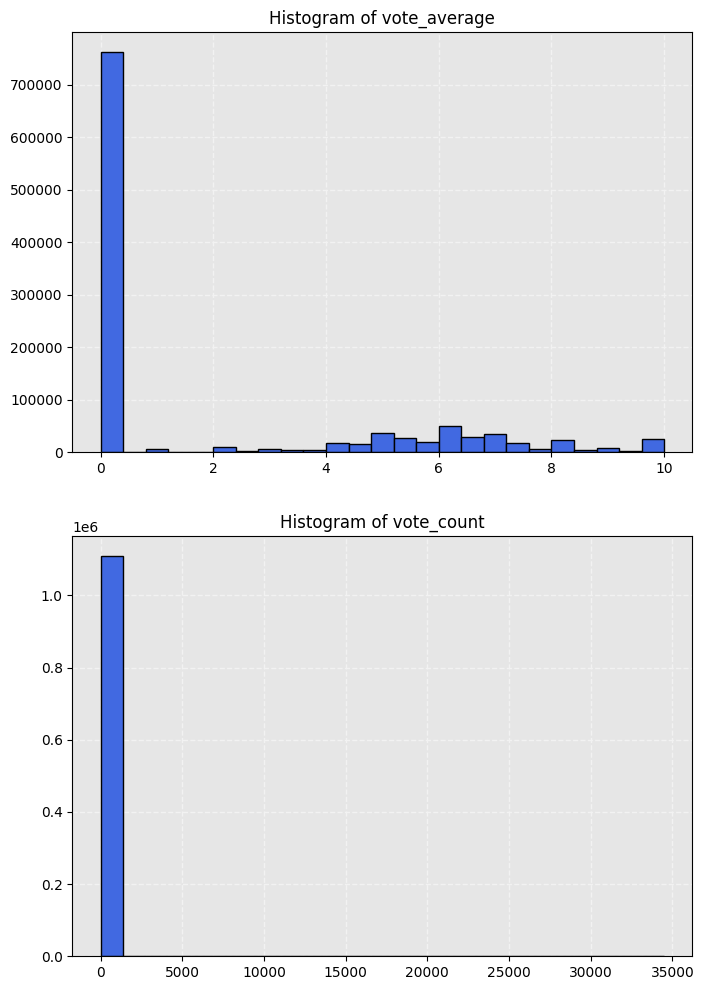

In [8]:
plot_hist(df_start, ["vote_average", "vote_count"])

There are over 700,000 movies in our dataset that have received no votes.  

Apparently, there are a lot of movies with a value_count of 0 but a positive value_average:

In [9]:
# Movies that have received no votes
print("Movies that have received no votes")
print(df_start[["vote_count"]][(df_start["vote_count"] == 0)].value_counts())

# Movies with a value_count of 0 but with a positive value_average
print("\nMovies with a vote_count of 0 but with a positive value_average")
print(df_start[["vote_average", "vote_count"]][(df_start["vote_average"] > 0) & (df_start["vote_count"] == 0)].value_counts())

Movies that have received no votes
vote_count
0             761371
Name: count, dtype: int64

Movies with a vote_count of 0 but with a positive value_average
vote_average  vote_count
6.00          0             90
7.00          0             81
8.00          0             71
10.00         0             65
2.00          0             55
5.00          0             50
4.00          0             37
9.00          0             26
1.00          0             26
3.00          0             23
9.50          0              3
4.50          0              2
3.50          0              2
7.50          0              2
8.50          0              2
5.50          0              1
6.50          0              1
Name: count, dtype: int64


Let's take a closer look at the missing data with a positive vote_count.

In [10]:
print("\nOVERVIEW\n")
print(df_start.isnull().sum())
print("=" * 100)

print("\nMISSING TITLE\n")
print("number of rows with missing title and missing original_title: ", len(df_start[["title", "original_title"]][(df_start["title"].isnull() & df_start["original_title"].isnull())]))
print("number of rows with missing title and missing original_title and a positive vote_count :", len(df_start[["title", "original_title", "vote_count"]][(df_start["title"].isnull() & df_start["original_title"].isnull() & df_start["vote_count"] > 0)]))

info_missing_values(df_start, 'genres','vote_count')
info_missing_values(df_start, 'production_companies','vote_count')
info_missing_values(df_start, 'production_countries','vote_count')
info_missing_values(df_start, 'spoken_languages','vote_count')
info_missing_values(df_start, 'keywords','vote_count')


OVERVIEW

title                       13
vote_average                 0
vote_count                   0
status                       0
release_date            175122
revenue                      0
runtime                      0
adult                        0
backdrop_path           813584
budget                       0
homepage                992881
original_language            0
original_title              13
overview                221786
popularity                   0
poster_path             344251
tagline                 954875
genres                  440625
production_companies    606294
production_countries    486807
spoken_languages        468766
keywords                806795
release_year                 0
movie_age                    0
dtype: int64

MISSING TITLE

number of rows with missing title and missing original_title:  13
number of rows with missing title and missing original_title and a positive vote_count : 0

MISSING GENRES 

Number of rows with missing genres :  440

---

## Data for Modeling

We only want to consider data for the models that have a positive vote_count, meaning movies that have been rated at least once. Likewise, the vote_count should be greater than a specific number, as movies that have only been rated a few times but received a rating of 10 could also distort the results. 

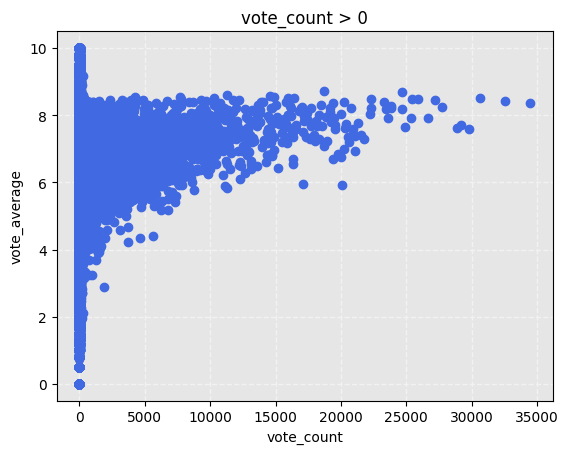

In [11]:
plt.scatter(x=df_start[(df_start["vote_count"] > 0)]["vote_count"], y=df_start[(df_start["vote_count"] > 0)]["vote_average"], color='royalblue') 
plt.title('vote_count > 0')
plt.xlabel('vote_count', color='k')
plt.ylabel('vote_average', color='k')
plt.grid(False)
plt.gca().set_axisbelow(True)
plt.gca().xaxis.grid(True, color='0.95', linewidth=1, linestyle="--")
plt.gca().yaxis.grid(True, color='0.95', linewidth=1, linestyle="--")

plt.show() 

It's evident that the more times a movie has been rated, the less likely the average rating is to be 10. This should be taken into account in the data selection.

We narrow down the data to take another look at the distribution of vote_count and vote_average. It can be observed that this distortion occurs up to a vote_count of 10.

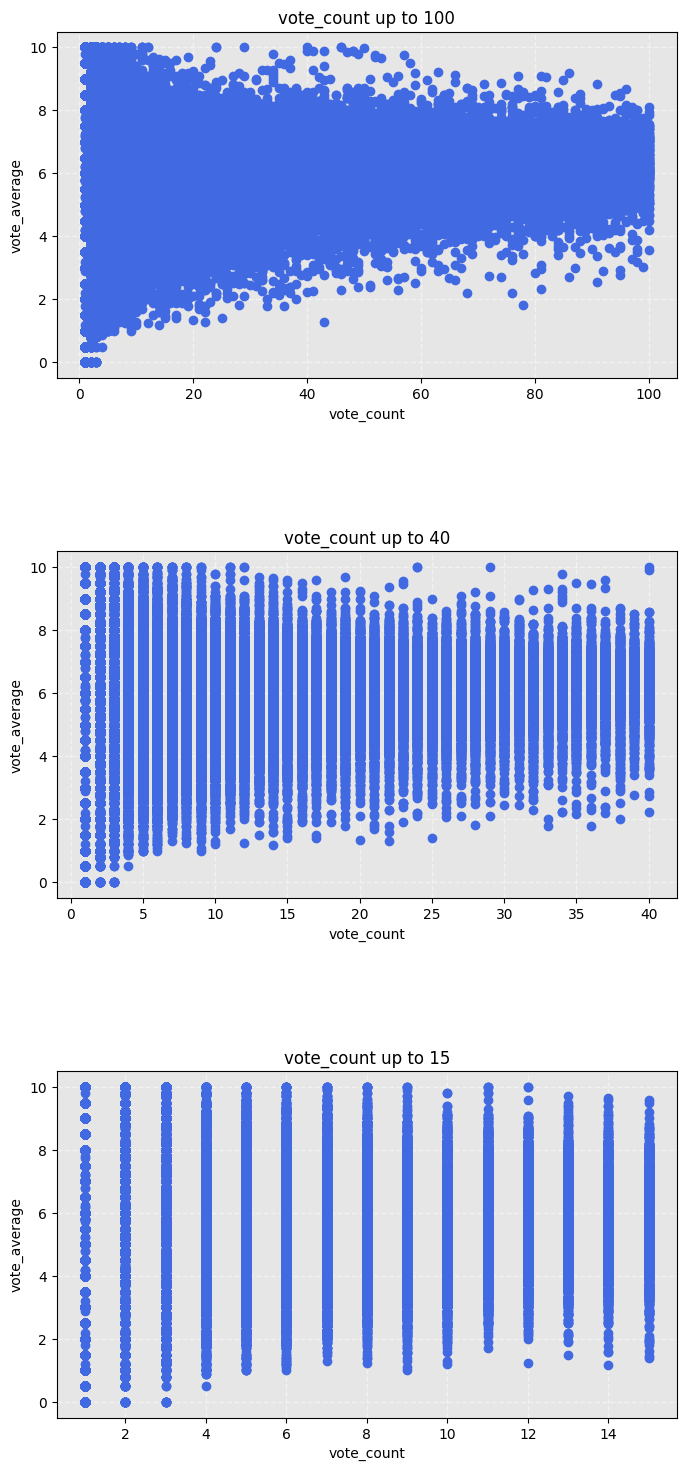

In [12]:
plot_scatter_filter(df_start, [("vote_count", 100), ("vote_count", 40), ("vote_count", 15)], ["vote_count up to 100", "vote_count up to 40", "vote_count up to 15"])

### Restricting the Data 
It only makes sense to consider movies that have already been rated and released.  
The first movie ever shown in cinema was "Workers Leaving the Lumière Factory" (also known as "La Sortie de l'Usine Lumière à Lyon"), a short documentary film directed by the Lumière brothers, Auguste and Louis Lumière. It was publicly screened on December 28, 1895, at the Grand Café in Paris. This event is often regarded as the birth of modern cinema. Therefore, we will only consider movies released from the year 1895 onwards. Since we defined release_year as zero for missing release_date, we will exclude movies without a specified release_year.  
  
 After filtering the data, we want to take a second look at the data that we will use for the models in another project.

In [13]:
df=df_start[(df_start["vote_count"] > 7) & (df_start["status"] == "Released") & (df_start["release_year"] > 0) & (df_start["runtime"] < 2000) & (df_start["release_year"] >= 1895)]

In [14]:
df.describe()

,vote_average,vote_count,revenue,runtime,budget,popularity,release_year,movie_age
count,91150.00,91150.00,91150.00,91150.00,91150.00,91150.00,91150.00,91150.00
mean,6.09,228.75,7758028.07,89.65,2916555.78,6.78,1996.63,27.37
std,1.06,1103.25,56127071.49,37.33,14837320.86,25.14,25.64,25.64
min,1.00,8.00,0.00,0.00,0.00,0.60,1895.00,1.00
25%,5.46,12.00,0.00,83.00,0.00,1.91,1984.00,9.00
50%,6.20,23.00,0.00,93.00,0.00,3.45,2007.00,17.00
75%,6.80,69.00,0.00,105.00,0.00,7.00,2015.00,40.00
max,10.00,34495.00,2923706026.00,1440.00,460000000.00,2994.36,2023.00,129.00


1. Vote Average:  
The vote average distribution seems relatively normal or symmetric, as the mean is close to the median. This suggests that most ratings cluster around the middle.  
There is a slight spread toward lower ratings since the minimum value is 1.0, but overall, ratings seem evenly spread around the mean.  
  
2. Vote Count:  
The vote count shows a right-skewed distribution, meaning most movies have very few votes, while a few movies have a large number of votes.  
The median is just around 23 votes, meaning half of the movies have fewer than 23 votes, but the maximum value is extremely high.  
  
3. Revenue:  
Revenue is highly right-skewed, with many films reporting zero or low revenues (25th, 50th, and 75th percentiles are all 0).  
However, a few films have very high earnings, with the maximum revenue reaching around 2.9 billion USD. This suggests that only a few blockbuster movies drive the top-end of the revenue spectrum.  
  
4. Runtime:  
Runtime appears to be normally distributed, with most movies ranging between 83 and 105 minutes.
There are a few outliers, such as the maximum runtime (which could be an error or an exceptional case).  
  
5. Budget:  
Similar to revenue, the budget has a right-skewed distribution, with many films reporting no budget data or low budgets.  
A few movies have extremely large budgets (up to 460 million USD), but the majority fall closer to zero.  
  
6. Popularity:  
Popularity is also right-skewed, with most movies having low popularity scores. The median popularity score is just around 3.45, but a small number of films have very high popularity scores, with the maximum reaching up to 2,994.  
  
7. Release Year:  
The release year distribution is left-skewed, meaning more recent films dominate the dataset.  
The median release year is 2007 and most films were released between 1984 and 2015. Older films (dating back to 1895) are outliers in this dataset.  
  
8. Movie Age:  
The movie age shows a right-skewed distribution, with most movies being relatively young, between 9 and 40 years old.  
There are a few very old movies (up to 129 years old), but these are outliers.  
  
Right-skewed distributions are common in variables like vote count, revenue, budget and popularity, where most movies have low values, but a small number of films have extremely high values.  
Vote average and runtime are more normally distributed, suggesting less extreme variation.  
The release year distribution is left-skewed, meaning more recent movies are prevalent, while movie age is right-skewed, showing many films are relatively young.  
  
Overall, the dataset reflects that the majority of films are less popular and less commercially successful, while a small number of blockbusters stand out with significantly higher values.

If the distribution of "vote_average":

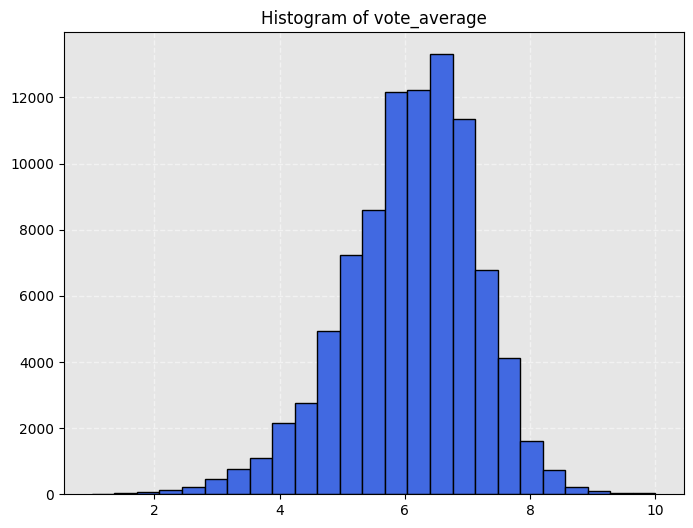

In [15]:
plot_hist(df, ["vote_average"])

### Correlations

When dealing with correlated features in a dataset, especially with respect to their impact on model accuracy, it is important to consider how outliers and new feature generation may affect our model.

1. Handling Outliers in Strongly Correlated Features
Outliers can have a significant impact on the performance of a machine learning model, especially if the features are correlated. Outliers can distort the correlation between features and the target variable. For instance, if a few movies have extremely high budgets or revenues, they might inflate the perceived correlation with vote_average. Many machine learning algorithms are sensitive to outliers. They can skew the results and make the model less accurate.

2. Generating New Features from Correlated Features
Creating new features from existing correlated features can sometimes improve model performance by capturing the underlying relationships better. Creating new features from correlated features can capture underlying relationships more effectively, but it's essential to monitor for overfitting and ensure that the model remains interpretable.

A **heatmap** is a graphical representation of data where individual values are represented as colors. When used to show correlation matrices, it helps us visually understand the relationships between different variables in our dataset.  
  
**Color intensity** represents the strength of correlation:  
Blue represents negative correlations.  
Red represents positive correlations.  
Neutral colors (like white or light grey) indicate weak or no correlation.  
  
The **numbers within the heatmap** represent the Pearson correlation coefficient (often ranging between -1 and +1):  
+1: A perfect positive correlation. As one variable increases, the other also increases.  
-1: A perfect negative correlation. As one variable increases, the other decreases.  
0: No correlation. The variables don’t affect each other.  
The closer a value is to +1 or -1, the stronger the relationship.  

<Axes: >

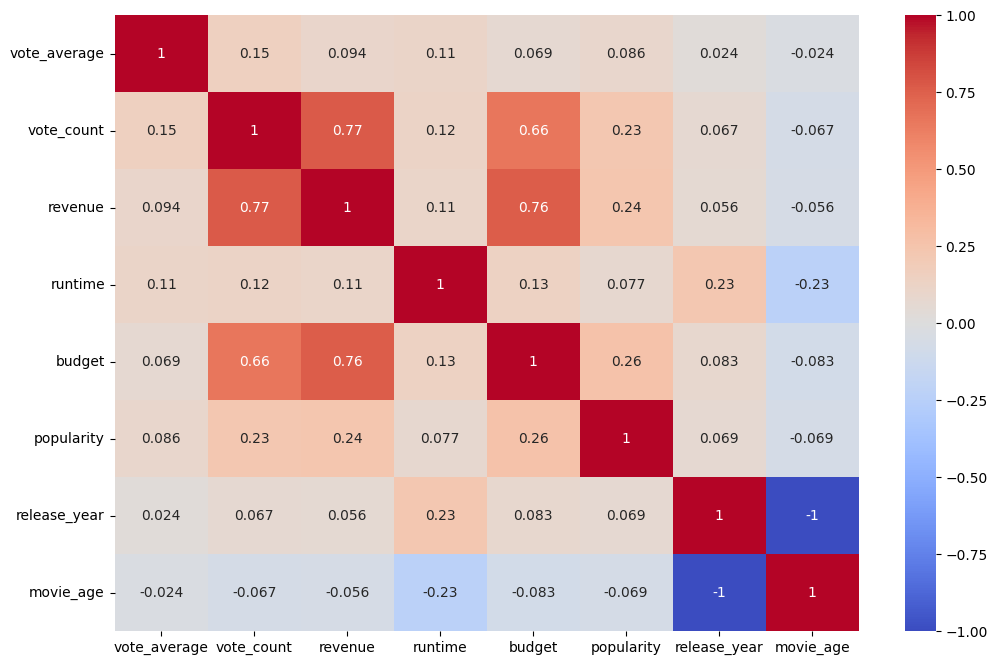

In [16]:
correlation_matrix = df[["vote_average", "vote_count", "revenue", "runtime", "budget", "popularity", "release_year", "movie_age"]].corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Strong Positive Correlations:  
Dark red or deep-colored cells with a correlation value close to +1 (0.7, 0.8, etc.).
We can see a high correlation between budget and revenue. This indicates that movies with bigger budgets tend to have higher revenues. We can also see a high correlation between vote_count and revenue. This indicates that movies with lots of votes also tend to have higher revenues (there is also exists a correlation between vote_count an budget, but its value isn't that close to 1).

  
Strong Negative Correlations:  
Movie_age and release_year show a strong negative correlation, buts that's fine.  
  
Weak or No Correlation:  
A vote_count and runtime correlation of close to 0 might mean that the number of votes a movie receives is not related to its length.  
  
Target Variable Focus:  
None of the variables have a strong correlation to vote_average.  
It’s possible that there are relationships between the features and vote_average that are non-linear and therefore not captured by simple correlation measures, which typically assess linear relationships. Even though individual features may not show strong correlations with the target, there could be interactions between features that are more predictive. For instance, combinations of features may have an influence on the target, even if individual features don’t.

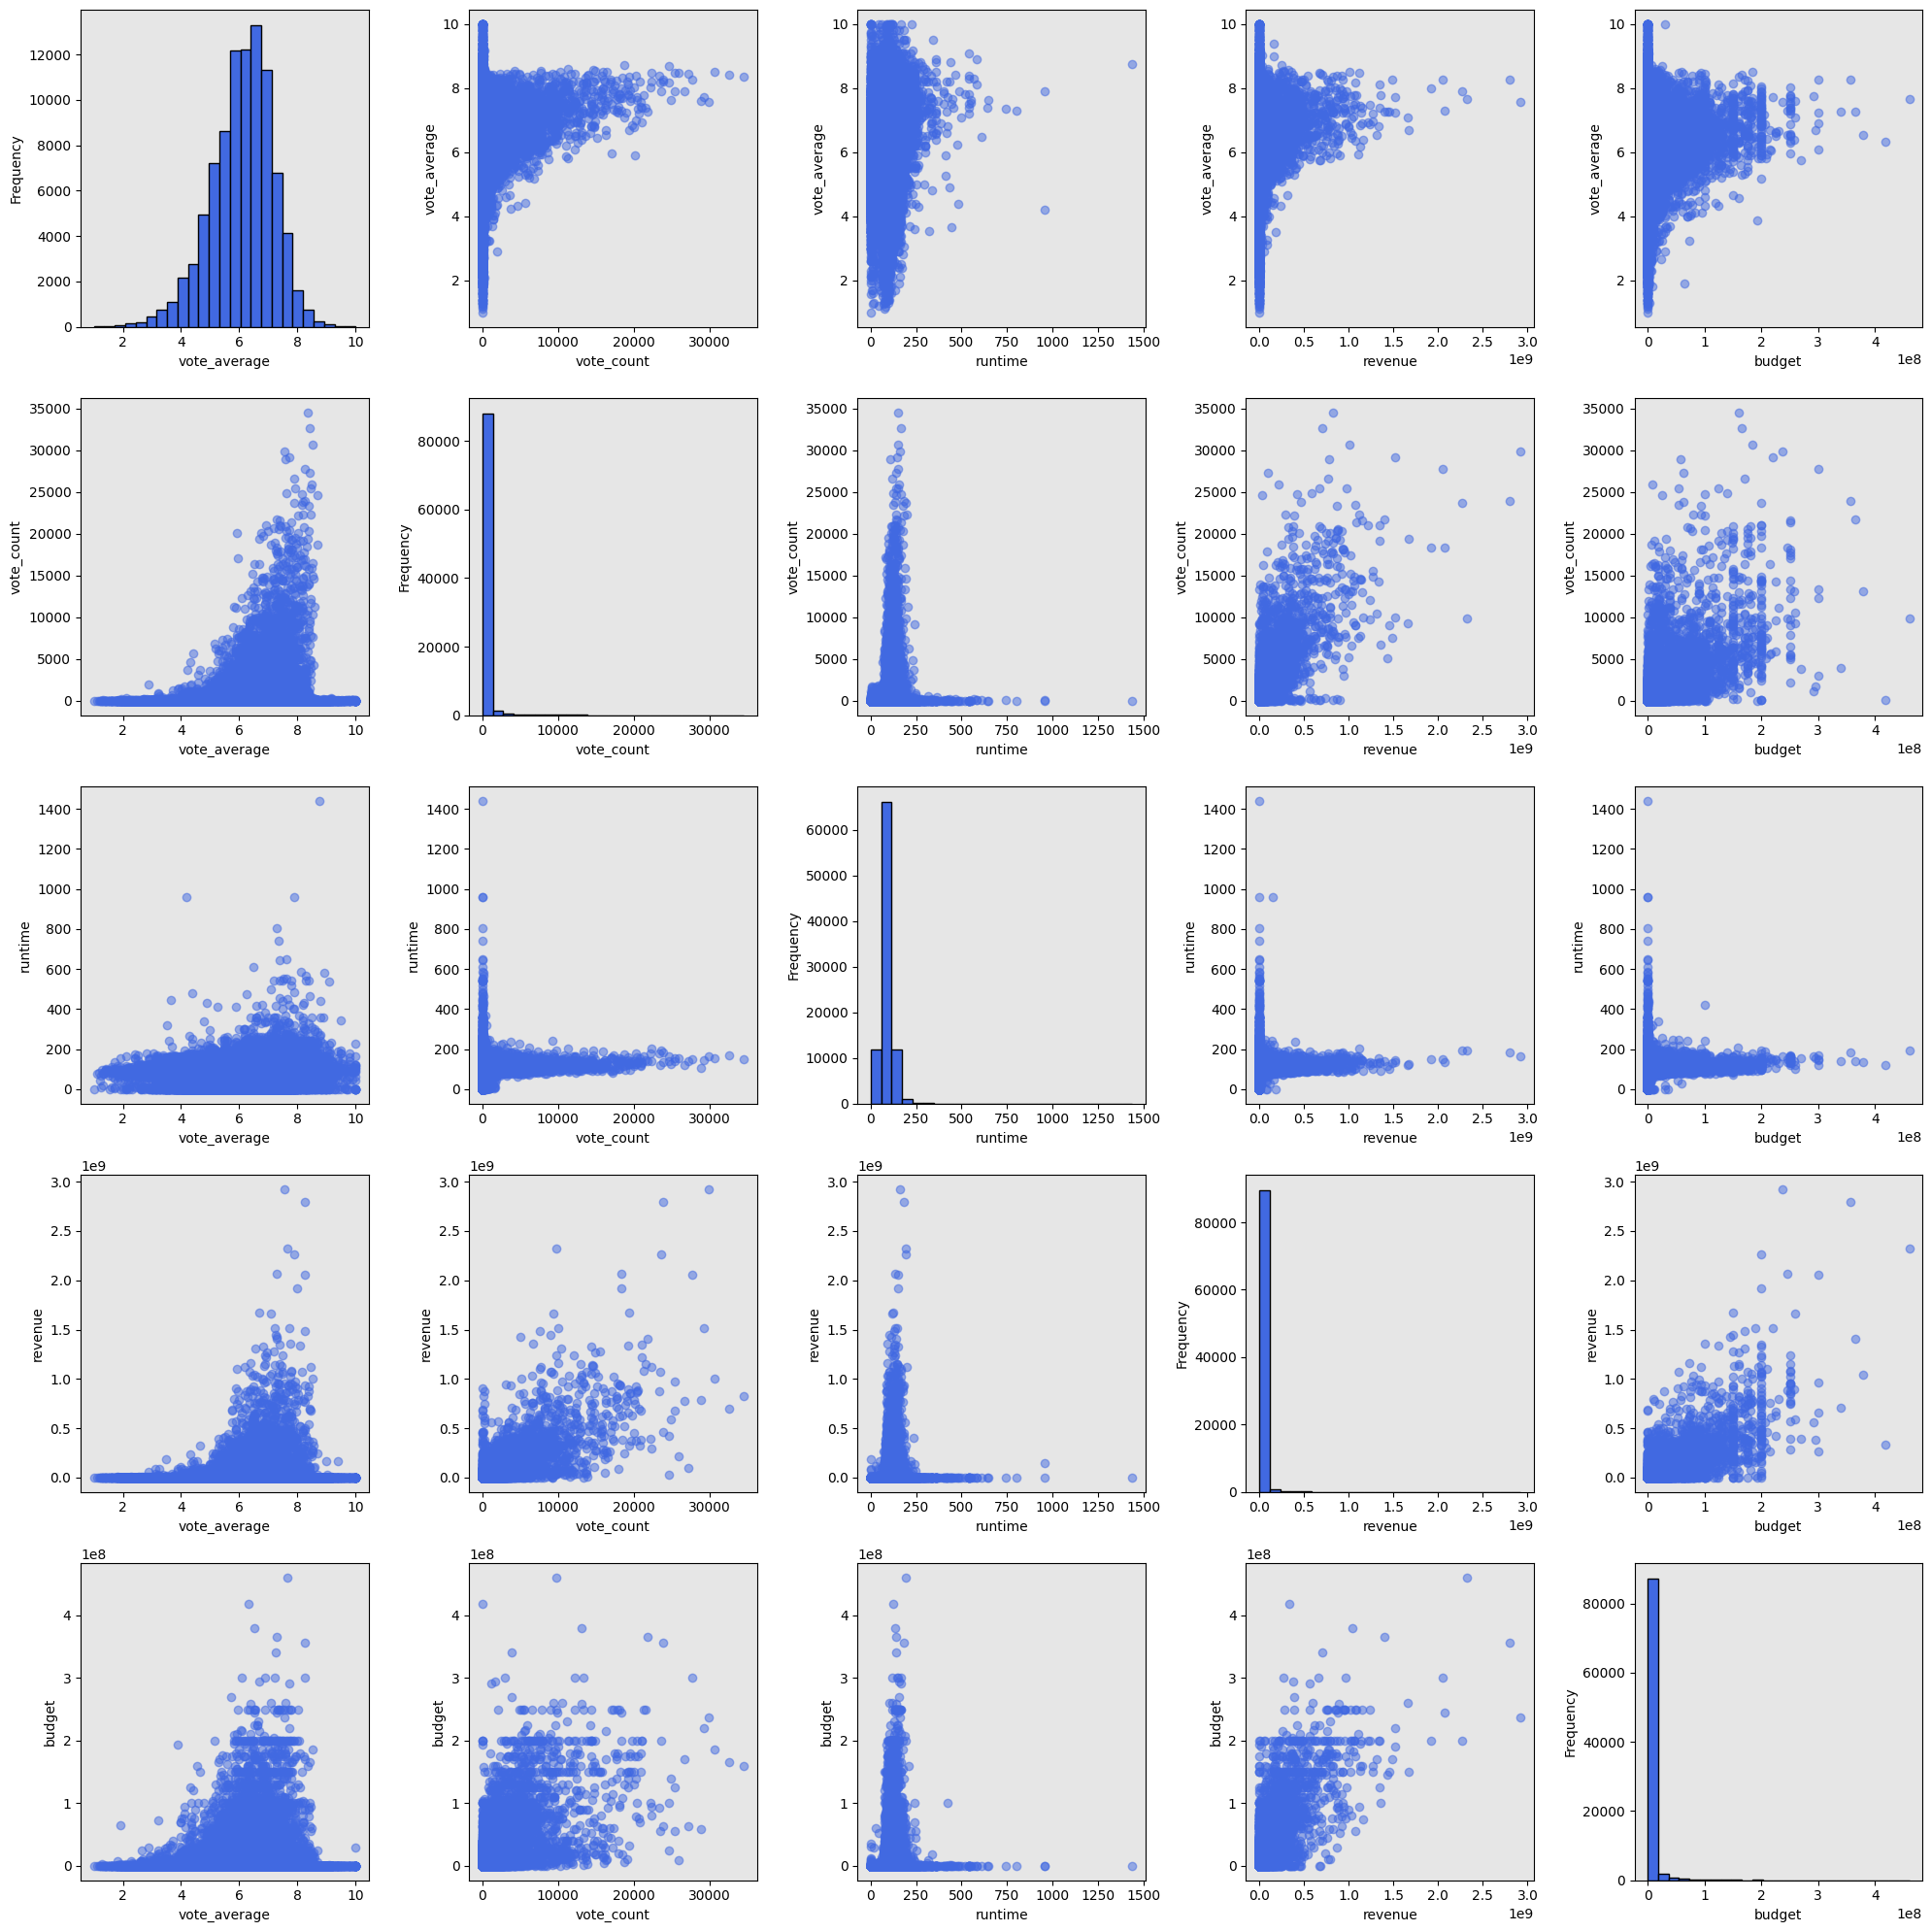

In [17]:
custom_scatter_matrix(df, ["vote_average", "vote_count", "runtime", "revenue", "budget"])

- It's evident that the longer a movie is, the less successful it tends to be.  
- A linear relationship can be inferred between budget and revenue.  
- Apart from outliers, revenue and budget behave similarly to vote_average compared to vote_count.


We take a closer look at the relationships between individual features.

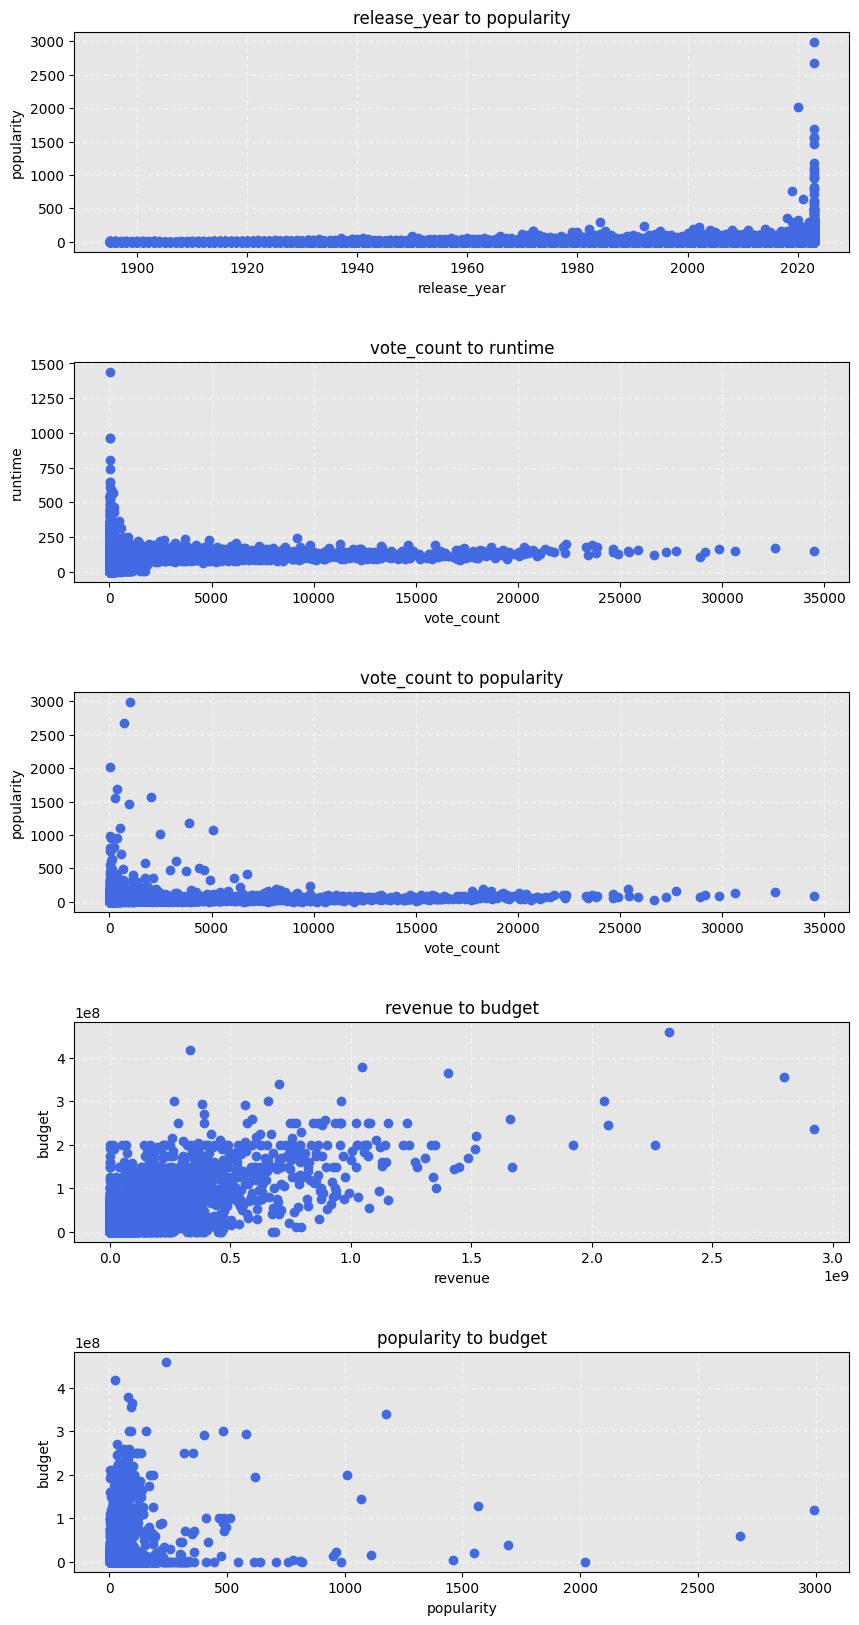

In [18]:
plot_scatter_pairs(df, [("release_year", "popularity"), ("vote_count", "runtime"), ("vote_count", "popularity"), ("revenue", "budget"), ("popularity", "budget")])

In summary, it can be said that popularity tends to increase the shorter the release date is in the past and movies are more likely to be rated the shorter their runtime is. However, a movie does not necessarily have to be popular to be rated at all.  
There is to be a correlation between budget and revenue. However, what's interesting is that a high budget doesn't necessarily lead to greater popularity.

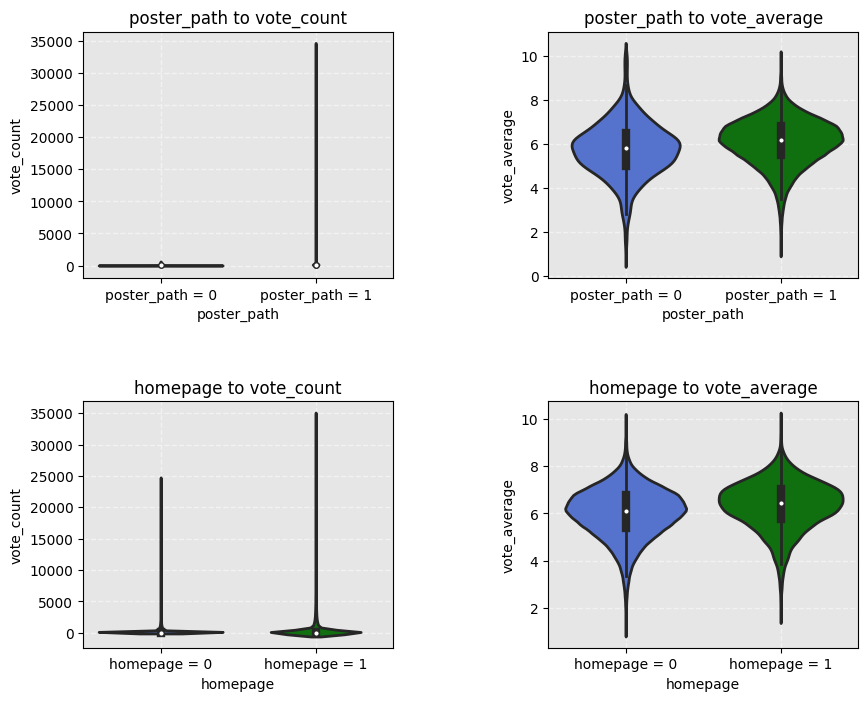

In [19]:
df_plot = df.copy()
df_plot["poster_path"] = df_plot["poster_path"].apply(lambda x: 1 if not pd.isnull(x) else 0)
df_plot["homepage"] = df_plot["homepage"].apply(lambda x: 1 if not pd.isnull(x) else 0)

plot_violin_pairs(df_plot, [("poster_path", "vote_count"), ("poster_path", "vote_average"), ("homepage", "vote_count"), ("homepage", "vote_average")])

In these plots, it can be observed that the presence of poster_path and homepage does have an impact on how much the movies are rated. However, once the movies have been rated, then, as expected, the existence of poster_path and homepage does not have a significant influence on the rating of the movies. Let's examine this situation while simultaneously considering popularity.

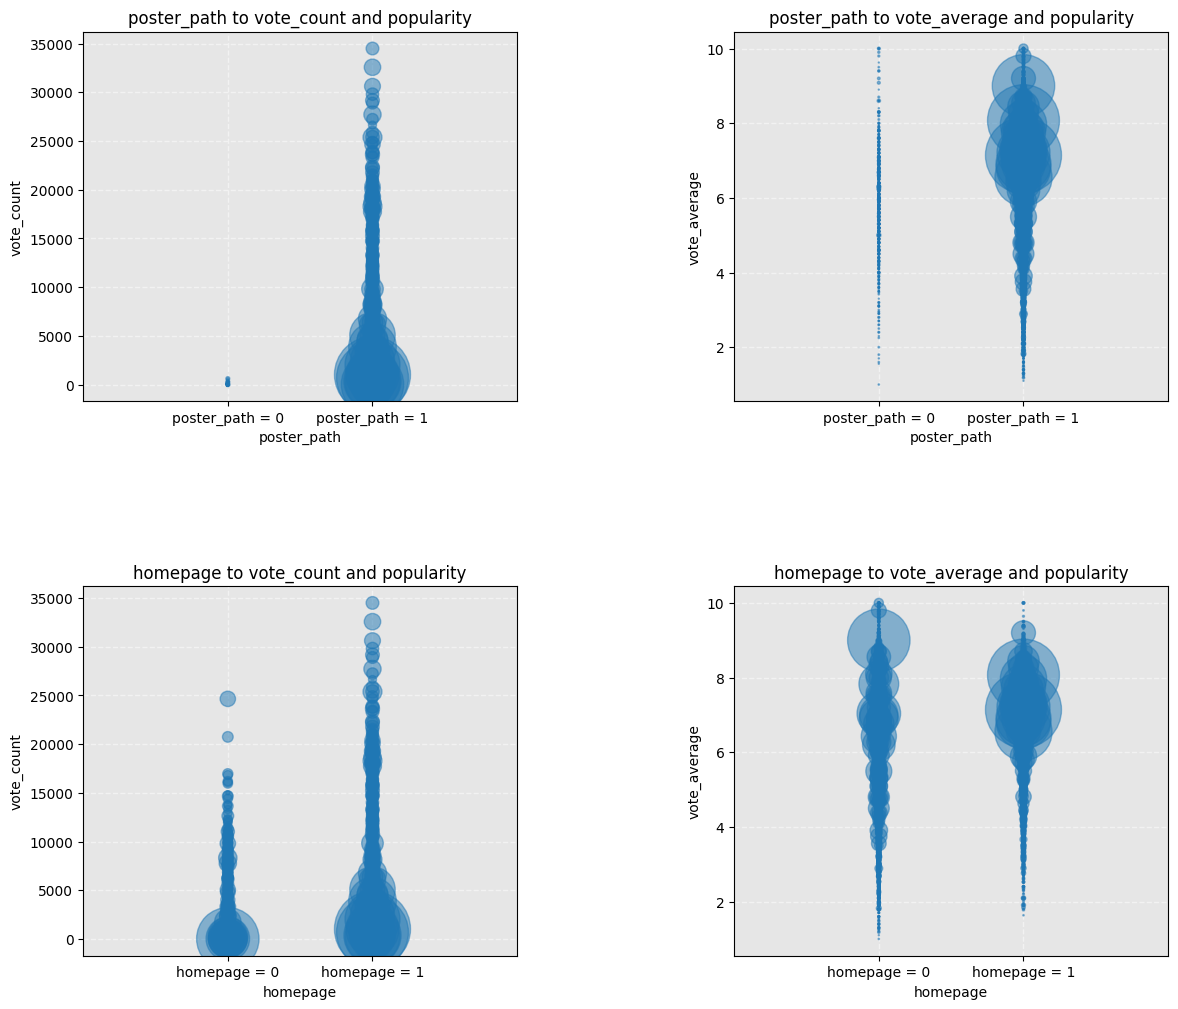

In [20]:
plot_scatter_s(df_plot, [['poster_path', 'vote_count', 'popularity'], ['poster_path', 'vote_average', 'popularity'], ['homepage', 'vote_count', 'popularity'], ['homepage', 'vote_average', 'popularity']])

The size of the points in these plots is determined by the feature popularity.  
In the first row of plots we see the influence of poster_path and in the second row of plots the influence of homepage on the popularity of the movies. There is a clear difference to observe.
If a movie does not have a poster, it is significantly less frequently rated and gains little popularity. Conversely, if there is a poster, it is frequently rated and the movies can also enjoy high popularity with fewer ratings.
The difference compared to the existence of a homepage is that movies can still be frequently rated without a homepage and can become popular even with fewer ratings.
As seen in the plots befor, the existence of a poster or a homepage seems to have no influence on the distribution of vote_average. However, the influence on popularity is again clearly visible: movies without a poster barely gain popularity, whereas movies without a homepage gain popularity as the vote_average increases.

In summary, it can be argued that the existence of a poster has more influence on the popularity of a movie than the existence of a homepage. If a movie ha a poster and/or a homepage, it appears to receive more attention.